<a href="https://colab.research.google.com/github/ahmedimf1/DataScience/blob/master/FB_DETR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [51]:
from PIL import Image, ImageDraw
import requests
import torch as th
from torch import nn
from torchvision.models import resnet50
import torchvision.transforms as T

Model Load

In [ ]:
model = th.hub.load("facebookresearch/detr", "detr_resnet101", pretrained = True)
model.eval()

In [8]:
model = model.cuda() ##GPU Usage

In [18]:
# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# COCO classes
CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

# Image Input and model predict



In [93]:
url = input()

https://c402277.ssl.cf1.rackcdn.com/photos/17646/images/magazine_hero/Medium_WW2122503.jpg?1565271495


In [94]:
im = Image.open(requests.get(url, stream=True).raw).resize((800,600))



In [95]:
im_tens = transform(im).unsqueeze(0).cuda()

In [96]:
with th.no_grad():
  output = model(im_tens)

# Object Detection

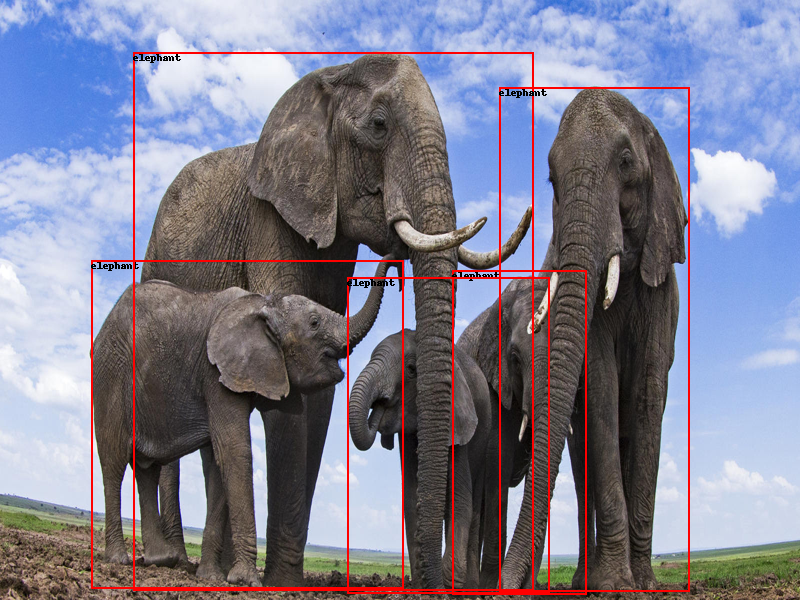

In [106]:
output["pred_boxes"].shape
output["pred_logits"][0].argmax(-1)
im2 = im.copy()
drw = ImageDraw.Draw(im2)
for box, logits in zip(output["pred_boxes"][0], output["pred_logits"][0]):
  cls = logits.argmax()
  if cls >= len(CLASSES):
    continue
  label = CLASSES[cls]
  # print(label)
  box = box.cpu() * th.Tensor([800, 600, 800, 600])
  x, y, w, h = box
  x0, x1 = x-w//2, x+w//2
  y0, y1 = y-h//2, y+h//2
  drw.rectangle([x0,y0,x1,y1], outline = "red", width = 2)
  drw.text((x0,y0), label, fill ="black", stroke_fill="black")
im2


TypeError: ignored